In [2]:
import math as m
import numpy as np

def blsprice(Price, Strike ,Rate, Time, Volatility):
    denomi = Volatility * m.sqrt(Time)  
    # calculating volatility times the square root of time
    numera = m.log(Price / Strike) + (Rate + 0.5 * Volatility ** 2 ) * Time
    d1 = numera / denomi
    d2 = d1 - denomi
    cdf1 = norm.cdf(d1) # calculating N(d1)
    cdf2 = norm.cdf(d2) # calculating N(d2)
    
    factor = m.exp(- Rate * Time)
    
    call = Price * cdf1 - Strike * factor * cdf2 # calculating the call option price 
    put = Strike * factor * (1 - cdf2) - Price * (1 - cdf1)
    # calculating the put option price 
    return call, put

In [3]:
from scipy.stats import norm

def blsdelta(Price, Strike , Rate, Time, Volatility):
    denomi = Volatility * m.sqrt(Time)  
    # calculating volatility times the square root of time
    numera = m.log(Price / Strike) + (Rate + 0.5 * Volatility ** 2) * Time
    d1 = numera / denomi
    c_delt = norm.cdf(d1)
    delta_call = c_delt
    delta_put = c_delt - 1
    return delta_call, delta_put

In [4]:
from matplotlib import pyplot as plt

vol = 0.16
r = 0.06
T = 2.0
K = 100
S0 = 100
mu = 0.08

def delta_hedge(reb):
    interval = T / reb
    alpha = np.zeros(reb + 1)
    B = np.zeros(reb + 1)
    S = np.zeros(reb + 1)
    S[0] = S0
    Put = np.zeros(reb + 1)
    P = np.zeros(reb + 1)
    P[0] = 0
    t = np.zeros(reb + 1)
    t[0] = 0
    alpha[0] = blsdelta(S[0], K, r, T, vol)[1]
    Put[0] = blsprice(S[0], K, r, T, vol)[1]
    B[0] = Put[0] - alpha[0] * S[0]
    for i in range(1, reb):
        t[i] = i * interval
        S[i] = S[i-1] * m.exp((mu-vol**2/2) * interval + vol * m.sqrt(interval) * np.random.randn())
        Put[i] = blsprice(S[i], K, r, T-t[i], vol)[1]
        alpha[i] = blsdelta(S[i], K, r, T-t[i], vol)[1]
        B[i] = B[i-1] * np.exp(r * interval) - S[i] * (alpha[i] - alpha[i-1])
        P[i] = B[i] + alpha[i] * S[i] - Put[i]
    t[reb] = T
    S[reb] = S[reb-1] * np.exp((mu - vol**2/2) * interval + vol * m.sqrt(interval) * np.random.randn()) 
    Put[reb] = max(0, K-S[reb])
    B[reb] = m.exp(r * interval) * B[reb-1]
    alpha[reb] = alpha[reb-1]
    P[reb] = B[reb] + alpha[reb] * S[reb] - Put[reb]
    
    plt.plot(t, S)
    plt.plot(t, B)
    plt.plot(t, S*alpha)
    plt.plot(t, P)
    R = P[reb] * m.exp(-r*T) / Put[0] 
    plt.xlabel("Years")
    plt.ylabel("Value")
    plt.legend(["Stock Price", "Risk Free Account", "Stock Holding", "Total Portfolio Value"])
    plt.show()
    return abs(R)


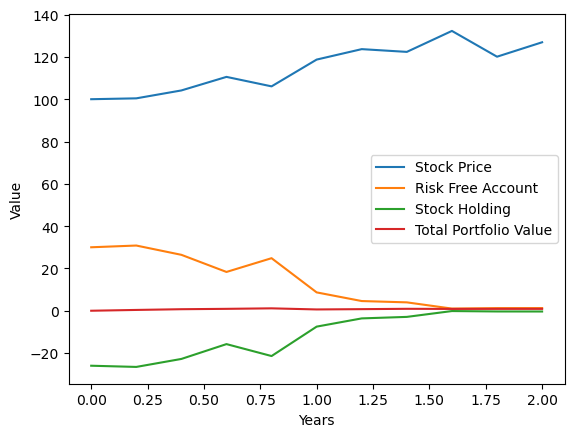

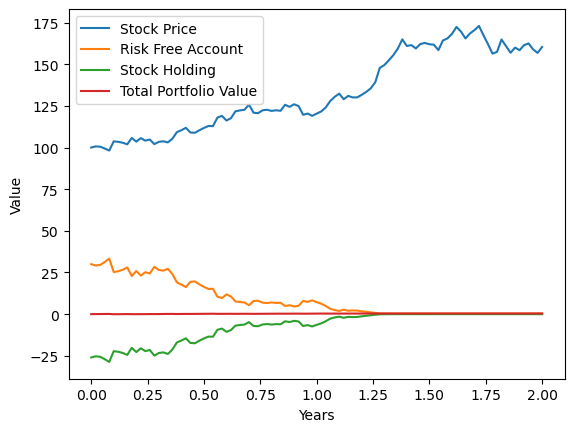

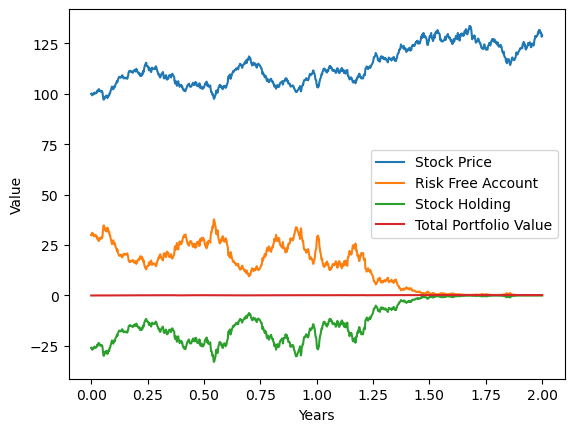

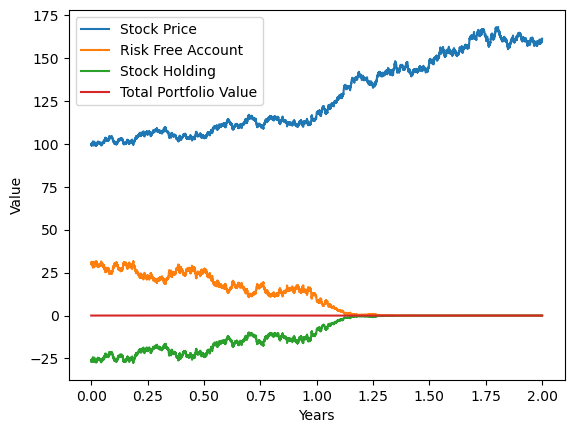

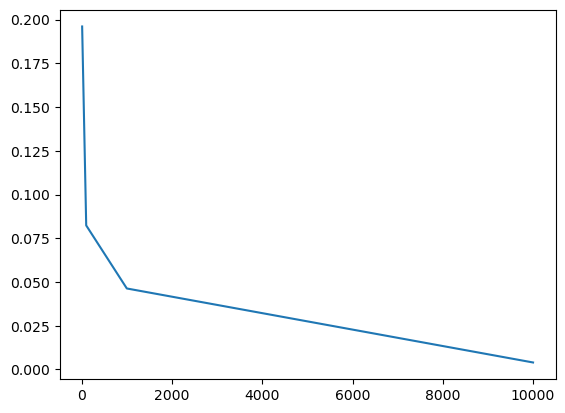

In [5]:
sim1 = delta_hedge(10)
sim2 = delta_hedge(100)
sim3 = delta_hedge(1000)
sim4 = delta_hedge(10000)
plt.plot(np.array([10,100,1000,10000]),[sim1,sim2,sim3,sim4])


We can observe that as rebalances increase, the relative hedge error starts at a peak value, and then decreases. 